In [27]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [28]:
#Loading the mnist data set into mnist_data variable
mnist_data = input_data.read_data_sets("/tmp/data", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [53]:
#hyperparameters/NN-properties
learning_rate = 0.1
batch_size = 128
no_of_epochs = 20000
HL1 = 784
HL2 = 128
HL3 = 128
input_size = 784
output_size = 10

In [54]:
#loading the input and output variables
x = tf.placeholder("float", [None, input_size], "Input")
y = tf.placeholder("float", [None, output_size], "Output")

In [55]:
#define NN related variables:
w1 = tf.Variable(tf.random_normal([input_size, HL1]))
w2 = tf.Variable(tf.random_normal([HL1, HL2]))
w3 = tf.Variable(tf.random_normal([HL2, HL3]))
w4 = tf.Variable(tf.random_normal([HL3, output_size]))

b1 = tf.Variable(tf.random_normal([HL1]))
b2 = tf.Variable(tf.random_normal([HL2]))
b3 = tf.Variable(tf.random_normal([HL3]))
b4 = tf.Variable(tf.random_normal([output_size]))

***Model Construction:***

In [56]:
#fully connected layer which connects input with HL1
a1 = tf.matmul(x, w1) + b1
#fully connected layer which connects HL1 with HL2
a2 = tf.matmul(a1, w2) + b2
#fully connected layer which connects HL2 with HL3
a3 = tf.add(tf.matmul(a2, w3), b3)
#fully connected layer which connects HL3 with output
y_predicted = tf.add(tf.matmul(a3, w4), b4)

**Loss calculation for the Model:**

In [57]:
#defining loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_predicted, labels = y))

#define optimizer for the model
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_output = optimizer.minimize(loss)

#evaluating model
correct_predictions = tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

## Intialize variables

In [58]:
initiated_variables = tf.global_variables_initializer()
accuracy_list = []

# Training

In [59]:
with tf.Session() as session:
    
    #run initializer to initiate variables
    session.run(initiated_variables)
    
    for epoch in range(no_of_epochs):
        batch_x, batch_y = mnist_data.train.next_batch(batch_size)
        #run optimizer to minimize loss
        session.run(training_output, feed_dict={x: batch_x, y: batch_y})
        
        if epoch % 100 == 0 or epoch == 1:
            # Calculate batch loss and accuracy
            cum_loss, cum_acc = session.run([loss, accuracy], feed_dict={x: batch_x, y: batch_y})
            accuracy_list.append(cum_acc)
            print("Step:",epoch,"Training Loss:", cum_loss, "Training accuracy:", cum_acc)
    
    print("Testing Accuracy:", session.run(accuracy, feed_dict={x: mnist_data.test.images, y: mnist_data.test.labels}))

('Step:', 0, 'Training Loss:', 275839.06, 'Training accuracy:', 0.1953125)
('Step:', 1, 'Training Loss:', 391086.97, 'Training accuracy:', 0.328125)
('Step:', 100, 'Training Loss:', 4633.5547, 'Training accuracy:', 0.84375)
('Step:', 200, 'Training Loss:', 1869.4397, 'Training accuracy:', 0.8515625)
('Step:', 300, 'Training Loss:', 1237.5536, 'Training accuracy:', 0.875)
('Step:', 400, 'Training Loss:', 1054.5239, 'Training accuracy:', 0.9140625)
('Step:', 500, 'Training Loss:', 467.34268, 'Training accuracy:', 0.859375)
('Step:', 600, 'Training Loss:', 699.24316, 'Training accuracy:', 0.8359375)
('Step:', 700, 'Training Loss:', 499.2543, 'Training accuracy:', 0.90625)
('Step:', 800, 'Training Loss:', 180.93491, 'Training accuracy:', 0.90625)
('Step:', 900, 'Training Loss:', 261.51712, 'Training accuracy:', 0.90625)
('Step:', 1000, 'Training Loss:', 314.33032, 'Training accuracy:', 0.90625)
('Step:', 1100, 'Training Loss:', 363.98053, 'Training accuracy:', 0.859375)
('Step:', 1200, 'Tr

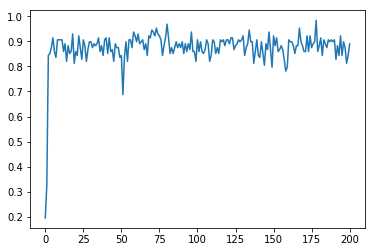

In [61]:
plt.plot(accuracy_list)
plt.show()

In [66]:
moving_average_list = []
for i in range(5):
    moving_average_list.append(sum(accuracy_list[i*40:(i+1)*40])/40.0)


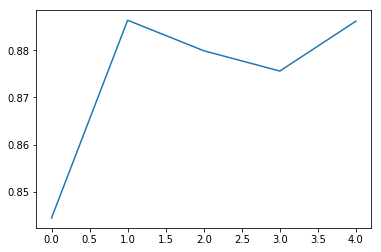

In [67]:
plt.plot(moving_average_list)
plt.show()